<a href="https://colab.research.google.com/github/bjelikj/DT2119/blob/master/Labs/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
"""
Necessary files:
- lab1_proto.py
- lab1_tools.py
- lab2_proto.py
- lab2_tools.py
- lab3_proto.py
- lab3_tools.py
- prondict.py
- standardization.py

If not uploaded to Google Drive:
- lab2_models_all.npz
- lab3_example.npz
"""


from google.colab import files
files.upload()

Saving standardization.py to standardization (3).py


{'standardization.py': b'from sklearn.preprocessing import StandardScaler\r\nfrom keras.utils import np_utils\r\n\r\ndef normalize_features(train_x, val_x, test_x,):\r\n    """\r\n    Inputs:\r\n        train_x: train set for specified features\r\n        val_x: validation set for specified features\r\n        test_x: test set for specified features\r\n\r\n    Output\r\n        norm_train_x: normalized train set features\r\n        norm_val_x: normalized val set features\r\n        norm_test_x: normalized test set features\r\n    """\r\n    scaler = StandardScaler()\r\n    scaler = scaler.fit(train_x)\r\n    norm_train_x = scaler.transform(train_x)\r\n    norm_val_x = scaler.transform(val_x)\r\n    norm_test_x = scaler.transform(test_x)\r\n\r\n    return [norm_train_x.astype(\'float32\'), norm_val_x.astype(\'float32\'), norm_test_x.astype(\'float32\')]\r\n\r\ndef normalize_targets(train_y, val_y, test_y, stateList):\r\n    """\r\n    Inputs:\r\n        train_y: train set targets\r\n   

In [2]:
from lab1_proto import *
from lab2_proto import *
from lab3_proto import *
from lab1_tools import *
from lab2_tools import *
from lab3_tools import *
from prondict import prondict
from standardization import *

import numpy as np
import os

Using TensorFlow backend.


## Check examples


In [0]:
example = np.load('/content/drive/My Drive/Lab3/lab3_example.npz', allow_pickle=True)['example'].item()

# 4.1 Target Class Definition

In [5]:
phoneHMMs = np.load('/content/drive/My Drive/Lab3/lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones}
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])]
print(stateList)

['ah_0', 'ah_1', 'ah_2', 'ao_0', 'ao_1', 'ao_2', 'ay_0', 'ay_1', 'ay_2', 'eh_0', 'eh_1', 'eh_2', 'ey_0', 'ey_1', 'ey_2', 'f_0', 'f_1', 'f_2', 'ih_0', 'ih_1', 'ih_2', 'iy_0', 'iy_1', 'iy_2', 'k_0', 'k_1', 'k_2', 'n_0', 'n_1', 'n_2', 'ow_0', 'ow_1', 'ow_2', 'r_0', 'r_1', 'r_2', 's_0', 's_1', 's_2', 'sil_0', 'sil_1', 'sil_2', 'sp_0', 't_0', 't_1', 't_2', 'th_0', 'th_1', 'th_2', 'uw_0', 'uw_1', 'uw_2', 'v_0', 'v_1', 'v_2', 'w_0', 'w_1', 'w_2', 'z_0', 'z_1', 'z_2']


# 4.2 Forced Alignment

In [0]:
filename = '/content/drive/My Drive/tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav'
samples, samplingrate = loadAudio(filename)
lmfcc = mfcc(samples)
print("LMFCC Shape: ", lmfcc.shape)

wordTrans = list(path2info(filename)[2])
print("Sequence of digits: ", wordTrans)

print("Pronunciation dictionary: ", prondict)

phoneTrans = words2phones(wordTrans, prondict)
print("Phone level transcription: ", phoneTrans)
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans)

stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans
              for stateid in range(nstates[phone])]

LMFCC Shape:  (178, 13)
Sequence of digits:  ['z', '4', '3']
Pronunciation dictionary:  {'o': ['ow'], 'z': ['z', 'iy', 'r', 'ow'], '1': ['w', 'ah', 'n'], '2': ['t', 'uw'], '3': ['th', 'r', 'iy'], '4': ['f', 'ao', 'r'], '5': ['f', 'ay', 'v'], '6': ['s', 'ih', 'k', 's'], '7': ['s', 'eh', 'v', 'ah', 'n'], '8': ['ey', 't'], '9': ['n', 'ay', 'n']}
Phone level transcription:  ['sil', 'z', 'iy', 'r', 'ow', 'sp', 'f', 'ao', 'r', 'sp', 'th', 'r', 'iy', 'sp', 'sil']


In [0]:
# Compare with examples
for i in example['utteranceHMM'].keys():
    print(compare(utteranceHMM[i], example['utteranceHMM'][i]))

obsloglik = log_multivariate_normal_density_diag(lmfcc, utteranceHMM['means'], utteranceHMM['covars'])
viterbi_loglik, viterbi_path = viterbi(obsloglik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']))
viterbiStateTrans = [stateTrans[idx] for idx in viterbi_path.astype(np.int64)] # Forced Alignment

print('Comparing obsloglik...', compare(obsloglik, example['obsloglik']))
print('Comparing viterbiPath...', compare(viterbi_path, example['viterbiPath']))
print('Comparing viterbiStateTrans...', np.all(viterbiStateTrans == example['viterbiStateTrans']))

frames = frames2trans(viterbiStateTrans, outfilename= ''.join(path2info(filename)[2:]) + '.lab')

True
True
True
True
Comparing obsloglik... True
Comparing viterbiPath... True
Comparing viterbiStateTrans... True


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


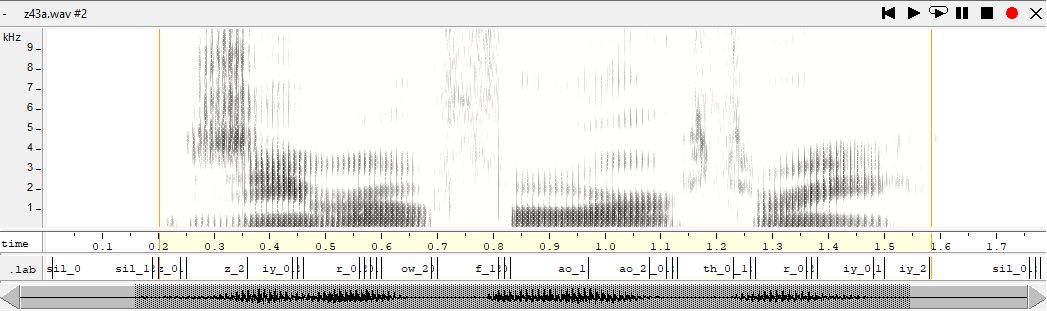

In [0]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/Lab3/z43a_wavesurfer.png')

# 4.3 Feature Extraction

In [0]:
"""
from tqdm import tqdm
traindata = []
for root, dirs, files in tqdm(os.walk('/content/drive/My Drive/tidigits/disc_4.1.1/tidigits/train'), desc='dirs'):
  for file in files:
    if file.endswith('.wav'):
      filename = os.path.join(root, file)
      samples, samplingrate = loadAudio(filename)
      lmfcc, mspec_, targets =  extract_features_and_targets(filename)
      traindata.append({'filename': filename, 'lmfcc': lmfcc,
                        'mspec': mspec_, 'targets': targets})

np.savez('/content/drive/My Drive/Lab3/traindata.npz', traindata=traindata)
"""

"\nfrom tqdm import tqdm\ntraindata = []\nfor root, dirs, files in tqdm(os.walk('/content/drive/My Drive/tidigits/disc_4.1.1/tidigits/train'), desc='dirs'):\n  for file in files:\n    if file.endswith('.wav'):\n      filename = os.path.join(root, file)\n      samples, samplingrate = loadAudio(filename)\n      lmfcc, mspec_, targets =  extract_features_and_targets(filename)\n      traindata.append({'filename': filename, 'lmfcc': lmfcc,\n                        'mspec': mspec_, 'targets': targets})\n\nnp.savez('/content/drive/My Drive/Lab3/traindata.npz', traindata=traindata)\n"

In [0]:
"""
testdata = []
for root, dirs, files in tqdm(os.walk('/content/drive/My Drive/tidigits/disc_4.2.1/tidigits/test'), desc='dirs'):
  for file in files:
    if file.endswith('.wav'):
      filename = os.path.join(root, file)
      samples, samplingrate = loadAudio(filename)
      lmfcc, mspec_, targets =  extract_features_and_targets(filename)
      testdata.append({'filename': filename, 'lmfcc': lmfcc,
                        'mspec': mspec_, 'targets': targets})

np.savez('/content/drive/My Drive/Lab3/testdata.npz', testdata=testdata)
"""

"\ntestdata = []\nfor root, dirs, files in tqdm(os.walk('/content/drive/My Drive/tidigits/disc_4.2.1/tidigits/test'), desc='dirs'):\n  for file in files:\n    if file.endswith('.wav'):\n      filename = os.path.join(root, file)\n      samples, samplingrate = loadAudio(filename)\n      lmfcc, mspec_, targets =  extract_features_and_targets(filename)\n      testdata.append({'filename': filename, 'lmfcc': lmfcc,\n                        'mspec': mspec_, 'targets': targets})\n\nnp.savez('/content/drive/My Drive/Lab3/testdata.npz', testdata=testdata)\n"

# 4.4 Training and Validation Sets

In [0]:
#train_data = np.load('/content/drive/My Drive/Lab3/traindata.npz', allow_pickle=True)['traindata']

In [0]:
#train_val_split(train_data)

# 4.5 Acoustic Context (Dynamic Features)

In [0]:
train_data = np.load('/content/drive/My Drive/Lab3/training_data.npy', allow_pickle=True)
val_data = np.load('/content/drive/My Drive/Lab3/validation_data.npy', allow_pickle=True)
test_data = np.load('/content/drive/My Drive/Lab3/testdata.npz', allow_pickle=True)['testdata']

In [0]:
from tqdm import tqdm
def create_dynamic_features(data):
    """ create_dynamic_features: Creates dynamic features by concatinated 7 
        lmfcc or mspec featues together for each step

    Args:
        data: list of dictionaries with keys: 'lmfcc', 'mspec' and 'targets'
    
    Returns:
        lmfcc_features: [NxD_lmfcc * 7] where N = number of all concatinated samples of all words in data
        mspec_features: [NxD_mspec * 7] where N = of all concatinated samples of all words in data
        targets: [N,] index of state for each sample
    """
    
    D_lmfcc = data[0]['lmfcc'].shape[1]
    D_mspec = data[0]['mspec'].shape[1]
    N = sum([len(x['targets']) for x in data])

    # Features to be returned
    dynlmfcc_features = np.zeros((N, D_lmfcc * 7))
    dynmspec_features = np.zeros((N, D_mspec * 7))
    
    # Targets to be returned
    targets = []

    # through all data
    k = 0
    for x in tqdm(data): 

        times, dim = x['lmfcc'].shape
        # for each time step
        for i in range(times):
            if i < 3 or i >= times - 3:
                dynlmfcc_features[k, :] = np.hstack(np.pad(x['lmfcc'], pad_width=((3, 3), (0, 0)), mode='reflect')[i:i+7, :])
                dynmspec_features[k, :] = np.hstack(np.pad(x['mspec'], pad_width=((3, 3), (0, 0)), mode='reflect')[i:i+7, :])
            else:
                dynlmfcc_features[k,:] = np.hstack(x['lmfcc'][i-3:i+4, :])
                dynmspec_features[k,:] = np.hstack(x['mspec'][i-3:i+4, :])
            k +=1
        targets = targets + x['targets']

    return dynlmfcc_features, dynmspec_features, targets

In [0]:
def create_non_dynamic_features(data):
    """ Puts lmfcc and mspec features in arrays that can used for training
    Arg
        data: list of dictionaries with keys: 'lmfcc', 'mspec' and 'targets'
    
    Output
        lmfcc_features: [NxD_lmfcc] where N is nr of all concatinated samples of all words in data
        mspec_features: [NxD_mspec] where N is nr of all concatinated samples of all words in data
        targets: [N,] index of state for each sample
    """
    
    D_lmfcc = data[0]['lmfcc'].shape[1]
    D_mspec = data[0]['mspec'].shape[1]
    N = sum([len(x['targets']) for x in data])

    # Features to be returned
    lmfcc_features = np.zeros((N,D_lmfcc))
    mspec_features = np.zeros((N,D_mspec))

    # Targets to be returned
    targets = []

    # through all data
    k = 0
    for x in tqdm(data): 
        times, dim = x['lmfcc'].shape
        ## for each timestep
        for i in range(times):
            lmfcc_features[k,:]=x['lmfcc'][i,:]
            mspec_features[k,:]=x['mspec'][i,:]
            k +=1
        targets = targets + x['targets']
    return lmfcc_features, mspec_features, targets

In [6]:
# Features & Dynamic features

lmfcc_train_x, mspec_train_x, train_y = create_non_dynamic_features(train_data)
dynlmfcc_train_x, dynmspec_train_x, train_y = create_dynamic_features(train_data)
#np.save('/content/drive/My Drive/Lab3/lmfcc_train_x.npy', lmfcc_train_x)
#np.save('/content/drive/My Drive/Lab3/mspec_train_x.npy', mspec_train_x)
#np.save('/content/drive/My Drive/Lab3/dynlmfcc_train_x.npy', dynlmfcc_train_x)
#np.save('/content/drive/My Drive/Lab3/dynmspec_train_x.npy', dynmspec_train_x)
np.save('/content/drive/My Drive/Lab3/train_y.npy', train_y)

100%|██████████| 7699/7699 [01:40<00:00, 76.36it/s]


In [0]:
del lmfcc_train_x
del mspec_train_x
del train_y
del train_data

In [8]:
lmfcc_val_x, mspec_val_x, val_y = create_non_dynamic_features(val_data)
dynlmfcc_val_x, dynmspec_val_x, val_y = create_dynamic_features(val_data)
np.save('/content/drive/My Drive/Lab3/lmfcc_val_x.npy', lmfcc_val_x)
np.save('/content/drive/My Drive/Lab3/mspec_val_x.npy', mspec_val_x)
np.save('/content/drive/My Drive/Lab3/dynlmfcc_val_x.npy', dynlmfcc_val_x)
np.save('/content/drive/My Drive/Lab3/dynmspec_val_x.npy', dynmspec_val_x)
np.save('/content/drive/My Drive/Lab3/val_y.npy', val_y)

100%|██████████| 924/924 [00:06<00:00, 142.71it/s]


In [9]:
lmfcc_test_x, mspec_test_x, test_y = create_non_dynamic_features(test_data)
dynlmfcc_test_x, dynmspec_test_x, test_y = create_dynamic_features(test_data)
np.save('/content/drive/My Drive/Lab3/lmfcc_test_x.npy', lmfcc_test_x)
np.save('/content/drive/My Drive/Lab3/mspec_test_x.npy', mspec_test_x)
np.save('/content/drive/My Drive/Lab3/dynlmfcc_test_x.npy', dynlmfcc_test_x)
np.save('/content/drive/My Drive/Lab3/dynmspec_test_x.npy', dynmspec_test_x)
np.save('/content/drive/My Drive/Lab3/test_y.npy', test_y)

100%|██████████| 8700/8700 [01:44<00:00, 82.90it/s]


# 4.6 Feature Standardisation

In [0]:
train_y_one_hot, val_y_one_hot, test_y_one_hot = normalize_targets(train_y, val_y, test_y, stateList)

In [0]:
import matplotlib.pyplot as plt
def plot_history(history):

    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

#5 Phoneme Recognition with Deep Neural Networks

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from standardization import *
import numpy as np

## lmfcc features

In [0]:
lmfcc_train_x = np.load('/content/drive/My Drive/Lab3/lmfcc_train_x.npy', allow_pickle=True)
train_y = np.load('/content/drive/My Drive/Lab3/train_y.npy', allow_pickle=True)

lmfcc_val_x = np.load('/content/drive/My Drive/Lab3/lmfcc_val_x.npy', allow_pickle=True)
val_y = np.load('/content/drive/My Drive/Lab3/val_y.npy', allow_pickle=True)

lmfcc_test_x = np.load('/content/drive/My Drive/Lab3/lmfcc_test_x.npy', allow_pickle=True)
test_y = np.load('/content/drive/My Drive/Lab3/test_y.npy', allow_pickle=True)

In [0]:
# Normalize 
lmfcc_train_x, lmfcc_val_x, lmfcc_test_x = normalize_features(lmfcc_train_x, lmfcc_val_x, lmfcc_test_x)

In [0]:
train_y_one_hot, val_y_one_hot, test_y_one_hot = normalize_targets(train_y, val_y, test_y, stateList)

In [10]:
model = Sequential()

# A typical value for hidden nodes is 256, but you can experiment with this to see if convergence becomes faster or slower.
model.add(Dense(256, input_shape=(13,), activation='relu', dtype="float32"))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(61))
model.add(Activation('softmax', name='posterior'))

opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 61)                15677     
_________________________________________________________________
posterior (Activation)       (None, 61)                0         
Total params: 216,637
Trainable params: 216,637
Non-trainable params: 0
__________________________________________________

In [13]:
filepath = "/content/drive/My Drive/Lab3/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

history = model.fit(lmfcc_train_x, train_y_one_hot, epochs=10, batch_size=256,
          validation_data = (lmfcc_val_x, val_y_one_hot), callbacks=checkpoint)

Epoch 1/10
5238/5248 [============================>.] - ETA: 0s - loss: 0.9936 - accuracy: 0.6828
Epoch 00001: val_accuracy improved from -inf to 0.62748, saving model to /content/drive/My Drive/Lab3/weights.01-0.63.hdf5
5248/5248 [==============================] - 26s 5ms/step - loss: 0.9936 - accuracy: 0.6828 - val_loss: 1.2133 - val_accuracy: 0.6275
Epoch 2/10
5239/5248 [============================>.] - ETA: 0s - loss: 0.9877 - accuracy: 0.6845
Epoch 00002: val_accuracy did not improve from 0.62748
5248/5248 [==============================] - 24s 5ms/step - loss: 0.9876 - accuracy: 0.6845 - val_loss: 1.2280 - val_accuracy: 0.6260
Epoch 3/10
5239/5248 [============================>.] - ETA: 0s - loss: 0.9819 - accuracy: 0.6862
Epoch 00003: val_accuracy did not improve from 0.62748
5248/5248 [==============================] - 24s 5ms/step - loss: 0.9818 - accuracy: 0.6862 - val_loss: 1.2293 - val_accuracy: 0.6259
Epoch 4/10
5248/5248 [==============================] - ETA: 0s - loss:

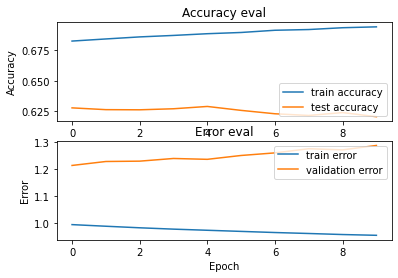

In [14]:
plot_history(history)

## Filterbank features

In [0]:
# Load featyres
mspec_train_x = np.load('/content/drive/My Drive/Lab3/mspec_train_x.npy', allow_pickle=True)
mspec_val_x = np.load('/content/drive/My Drive/Lab3/mspec_val_x.npy', allow_pickle=True)
mspec_test_x = np.load('/content/drive/My Drive/Lab3/mspec_test_x.npy', allow_pickle=True)

In [0]:
# Normalize 
mspec_train_x, mspec_val_x, mspec_test_x = normalize_features(mspec_train_x, mspec_val_x, mspec_test_x)

In [20]:
model = Sequential()

# A typical value for hidden nodes is 256, but you can experiment with this to see if convergence becomes faster or slower.
model.add(Dense(256, input_shape=(40,), activation='relu', dtype="float32"))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(61))
model.add(Activation('softmax', name='posterior'))

opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

filepath = "/content/drive/My Drive/Lab3/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

history = model.fit(mspec_train_x, train_y_one_hot, epochs=10, batch_size=256,
          validation_data = (mspec_val_x, val_y_one_hot), callbacks=checkpoint)

Epoch 1/10
5242/5248 [============================>.] - ETA: 0s - loss: 1.2606 - accuracy: 0.6062
Epoch 00001: val_accuracy improved from -inf to 0.63134, saving model to /content/drive/My Drive/Lab3/weights.01-0.63.hdf5
5248/5248 [==============================] - 39s 7ms/step - loss: 1.2604 - accuracy: 0.6063 - val_loss: 1.1638 - val_accuracy: 0.6313
Epoch 2/10
5247/5248 [============================>.] - ETA: 0s - loss: 1.1051 - accuracy: 0.6491
Epoch 00002: val_accuracy improved from 0.63134 to 0.64489, saving model to /content/drive/My Drive/Lab3/weights.02-0.64.hdf5
5248/5248 [==============================] - 33s 6ms/step - loss: 1.1051 - accuracy: 0.6491 - val_loss: 1.1216 - val_accuracy: 0.6449
Epoch 3/10
5239/5248 [============================>.] - ETA: 0s - loss: 1.0529 - accuracy: 0.6648
Epoch 00003: val_accuracy did not improve from 0.64489
5248/5248 [==============================] - 32s 6ms/step - loss: 1.0529 - accuracy: 0.6647 - val_loss: 1.1164 - val_accuracy: 0.6446


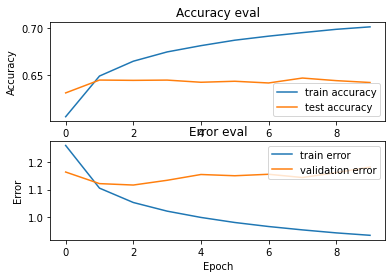

In [21]:
plot_history(history)

## dynamic lmfcc features

In [0]:
dynlmfcc_train_x = np.load('/content/drive/My Drive/Lab3/dynlmfcc_train_x.npy', allow_pickle=True)
dynlmfcc_val_x = np.load('/content/drive/My Drive/Lab3/dynlmfcc_val_x.npy', allow_pickle=True)
dynlmfcc_test_x = np.load('/content/drive/My Drive/Lab3/dynlmfcc_test_x.npy', allow_pickle=True)

In [0]:
dynlmfcc_train_x, dynlmfcc_val_x, dynlmfcc_test_x = normalize_features(dynlmfcc_train_x, dynlmfcc_val_x, dynlmfcc_test_x)

In [25]:
model = Sequential()

# A typical value for hidden nodes is 256, but you can experiment with this to see if convergence becomes faster or slower.
model.add(Dense(256, input_shape=(91,), activation='relu', dtype="float32"))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(61))
model.add(Activation('softmax', name='posterior'))

opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

filepath = "/content/drive/My Drive/Lab3/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

history = model.fit(dynlmfcc_train_x, train_y_one_hot, epochs=10, batch_size=256,
          validation_data = (dynlmfcc_val_x, val_y_one_hot), callbacks=checkpoint)

Epoch 1/10
5246/5248 [============================>.] - ETA: 0s - loss: 0.7867 - accuracy: 0.7416
Epoch 00001: val_accuracy improved from -inf to 0.77579, saving model to /content/drive/My Drive/Lab3/weights.01-0.78.hdf5
5248/5248 [==============================] - 26s 5ms/step - loss: 0.7867 - accuracy: 0.7416 - val_loss: 0.6719 - val_accuracy: 0.7758
Epoch 2/10
5246/5248 [============================>.] - ETA: 0s - loss: 0.6212 - accuracy: 0.7886
Epoch 00002: val_accuracy improved from 0.77579 to 0.79052, saving model to /content/drive/My Drive/Lab3/weights.02-0.79.hdf5
5248/5248 [==============================] - 26s 5ms/step - loss: 0.6212 - accuracy: 0.7886 - val_loss: 0.6297 - val_accuracy: 0.7905
Epoch 3/10
5242/5248 [============================>.] - ETA: 0s - loss: 0.5719 - accuracy: 0.8031
Epoch 00003: val_accuracy improved from 0.79052 to 0.79104, saving model to /content/drive/My Drive/Lab3/weights.03-0.79.hdf5
5248/5248 [==============================] - 26s 5ms/step - los

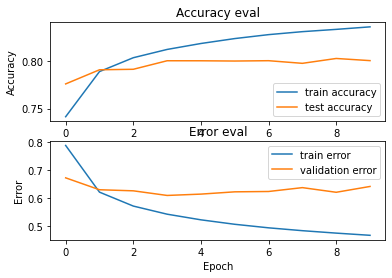

In [26]:
plot_history(history)

## dynamic filterbank features

In [0]:
dynmspec_train_x = np.load('/content/drive/My Drive/Lab3/dynmspec_train_x.npy', allow_pickle=True)
dynmspec_val_x = np.load('/content/drive/My Drive/Lab3/dynmspec_val_x.npy', allow_pickle=True)
dynmspec_test_x = np.load('/content/drive/My Drive/Lab3/dynmspec_test_x.npy', allow_pickle=True)

In [0]:
dynmspec_train_x, dynmspec_val_x, dynmspec_test_x = normalize_features(dynmspec_train_x, dynmspec_val_x, dynmspec_test_x)

In [0]:
train_y = np.load('/content/drive/My Drive/Lab3/train_y.npy', allow_pickle=True)
val_y = np.load('/content/drive/My Drive/Lab3/val_y.npy', allow_pickle=True)
test_y = np.load('/content/drive/My Drive/Lab3/test_y.npy', allow_pickle=True)
train_y_one_hot, val_y_one_hot, test_y_one_hot = normalize_targets(train_y, val_y, test_y, stateList)

In [0]:
model = Sequential()

# A typical value for hidden nodes is 256, but you can experiment with this to see if convergence becomes faster or slower.
model.add(Dense(256, input_shape=(91,), activation='relu', dtype="float32"))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(61))
model.add(Activation('softmax', name='posterior'))

opt = Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

filepath = "/content/drive/My Drive/Lab3/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

history = model.fit(dynmspec_train_x, train_y_one_hot, epochs=10, batch_size=256,
          validation_data = (dynmspec_val_x, val_y_one_hot), callbacks=checkpoint)

In [0]:
plot_history(history)

# 5.1 Detailed Evaluation

In [0]:
def state_level_acc(Y_test_indexes,Y_pred_indexes):
    return sum(Y_test_indexes==Y_pred_indexes) / len(Y_test_indexes)


featuretypes = ['lmfcc_dyn','mspec_dyn','lmfcc_non_dyn','mspec_non_dyn']
for f in featuretypes:
    Y_test_indexes,Y_pred_indexes=load_predictions(f)
    frame_level_accuracy = state_level_acc(Y_test_indexes,Y_pred_indexes)
    print("The frame level accuracy for "+f+" features is:", frame_level_accuracy)

In [0]:
print("Evaluating model on test data...")
results = model.evaluate(lmfcc_test_x, test_y_one_hot)
print("Test loss:", results[0])
print("Test acc:", results[1])


test_y_pred = np.argmax(model.predict(test_y), axis=1)

print("Confusion matrix:")
print(confusion_matrix(test_y, test_y_pred))
print("Classification reprot:")
print(classification_report(test_y, test_y_pred, digits=61))